# Corizo Major Project

# Wine Quality Prediction

## Author : Siddharth Patondikar

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Loading Dataset

In [2]:
wine_df = pd.read_csv('Wine_Quality_Red_wine.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

Dropping Null values

In [8]:
wine_df.dropna(inplace=True)
wine_df.shape

(1596, 12)

### EDA

Finding Correlation in data

In [9]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


Plotting correlation data

<AxesSubplot:>

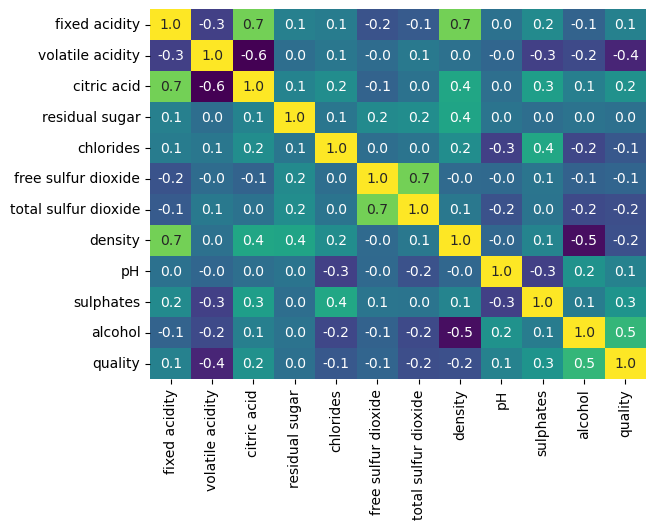

In [10]:
sns.heatmap(wine_df.corr(),annot=True,cbar=False,fmt = '.1f',cmap='viridis')

From correlation heatmap we can see that:

1. Volatile acidity has significant negative correlation with quality of wine
2. Alcohol has highest postive correlation with quality of wine, followed by sulphates and citric acid
3. Residual Sugar has 0 correlation with quality of wine

Dropping residual sugar column as correlation with quality is 0

In [11]:
wine_df.drop('residual sugar',axis=1,inplace=True)

In [12]:
wine_df['quality'].value_counts()

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

## Visualization

Text(0.5, 1.0, 'Quality of wine distribution in data')

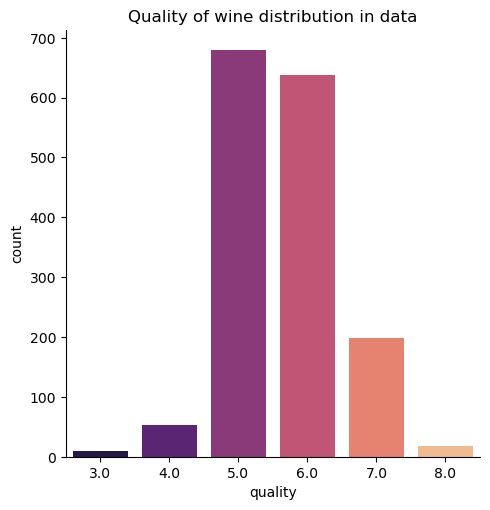

In [13]:
sns.catplot(data=wine_df,x='quality', kind='count', palette='magma')
plt.title('Quality of wine distribution in data')

Text(0.5, 1.0, 'Negative correlation b/w volatile acitdity and quality of wine')

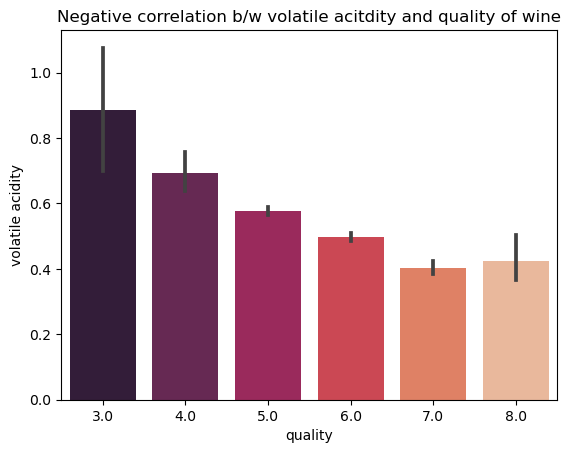

In [14]:
sns.barplot(x=wine_df['quality'],y=wine_df['volatile acidity'],palette='rocket')
plt.title("Negative correlation b/w volatile acitdity and quality of wine")

As the quality of wine is increasing, the volatile acidity in wine is decreasing, justifying the  negative correlation

Text(0.5, 1.0, 'sulphates vs quality of wine')

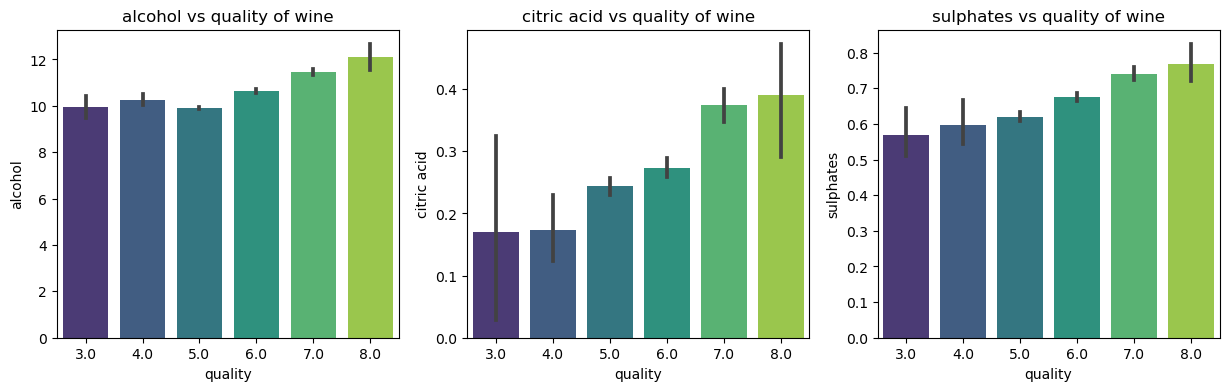

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.barplot(x=wine_df['quality'],y=wine_df['alcohol'],palette='viridis')
plt.title("alcohol vs quality of wine")

plt.subplot(1,3,2)
sns.barplot(x=wine_df['quality'],y=wine_df['citric acid'],palette='viridis')
plt.title("citric acid vs quality of wine")

plt.subplot(1,3,3)
sns.barplot(x=wine_df['quality'],y=wine_df['sulphates'],palette='viridis')
plt.title("sulphates vs quality of wine")

Alcohol,citric acid and sulphate amount increase is also a factor in wine quality increase. Hence, showing postive correlation

## Creating Bins

The quality is a categorical feature ranging from values 0-12. Below, I have created a function to create 3 category based on wine quality. The categories are as follows:

Quality >=7 : 2 (High Quality)

Quality between 4 and 6 : 1 (Medium Quality)

Quality <=3 : 0 (Low Quality)

In [16]:
# Creating function to create bins in quality
def create_bins(quality):
    if quality>=7:
        return 2
    elif quality<=6 and quality>=4:
        return 1
    else:
        return 0

In [17]:
#Using apply funtion to create a new column quality range
wine_df['quality_range'] = wine_df['quality'].apply(create_bins)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_range
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,1
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1


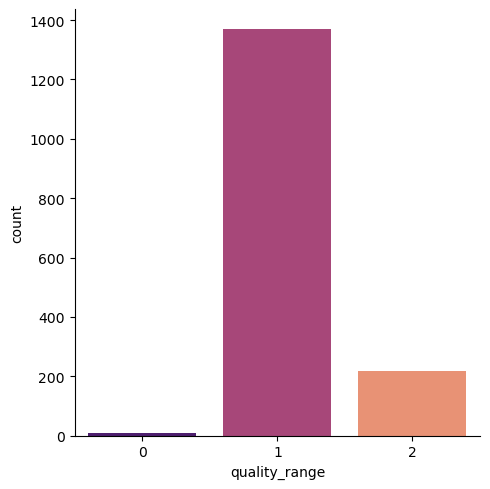

In [18]:
sns.catplot(data=wine_df, x='quality_range',kind='count',palette='magma')

## Model Building

In [19]:
x = wine_df.drop(["quality",'quality_range'],axis=True)
y = wine_df["quality_range"]

Creating Training and Test data. Taking 80% for train and 20% for test

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y , test_size=0.2, random_state=3)

Training the model using Random Forest Classifier

In [21]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier()

### Model Evaluation

In [22]:
Y_pred = clf.predict(X_test)
acc_score = accuracy_score(Y_pred, Y_test)

In [23]:
print('Accuracy : ', acc_score)

Accuracy :  0.896875


From above, we can see that the model has accuracy score of 0.896

Forming a new dataframe of y_test and predicted y_pred values for test data

In [24]:
predict_df = pd.DataFrame({"y_test": Y_test, "y_pred": Y_pred})

In [25]:
predict_df

,y_test,y_pred
267,2,1
410,1,1
947,2,2
1375,1,1
887,2,1
...,...,...
763,1,1
962,1,1
190,1,1
1178,1,1


Making a Confusion Matrix

In [26]:
y_pred = Y_pred.tolist()
y_test = Y_test.tolist()

In [27]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[  0   2   0]
 [  0 268   1]
 [  0  30  19]]


<AxesSubplot:>

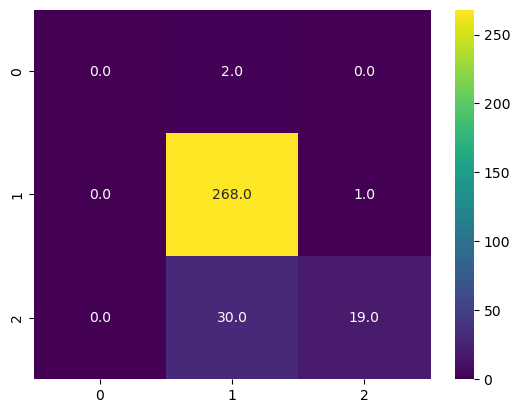

In [28]:
sns.heatmap(confusion_mat, annot=True,fmt = '.1f', cmap='viridis')

### Making prediction

In [29]:
data = list(wine_df.loc[0])[:-2]

In [30]:
data

[7.4, 0.7, 0.0, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]

In [31]:
import warnings
warnings.filterwarnings('ignore')
predict_q = clf.predict([data])

In [32]:
print(f'predicted quality range: {predict_q}')

if predict_q==1:
    print('Medium Quality wine')
elif predict_q==2:
    print('High Quality wine')
else:
    print('Low Quality wine')

predicted quality range: [1]
Medium Quality wine


Comparing with actual data

In [33]:
wine_df.head(1)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_range
0,7.4,0.7,0.0,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1


When comparing predicted quality range and given quality range are same. Hence, our prediction is correct